In [1]:
 from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)



In [6]:
worksheet = gc.open('deep').sheet1

rows = worksheet.get_all_values()


In [7]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'float'})
df = df.astype({'output':'float'})
df.head()

,input,output
0,3.0,56.0
1,5.0,67.0
2,6.0,73.0
3,7.0,32.0
4,8.0,13.0


In [8]:
x= df[['input']].values
y= df[['output']].values

In [9]:
x


array([[ 3.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 6.],
       [ 4.],
       [ 2.],
       [ 9.],
       [ 7.],
       [ 5.],
       [ 8.],
       [12.],
       [13.],
       [23.],
       [ 4.],
       [34.],
       [25.],
       [15.],
       [19.]])

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [11]:
Scaler = MinMaxScaler()

In [12]:
Scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train1=Scaler.transform(x_train)

In [14]:
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
]
)

In [15]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [16]:
ai_brain.fit(x_train1,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 843ms/step - loss: 4228.6040
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 4225.2700
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 4222.7676
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 4220.5439
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 4218.3931
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 4216.4268
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 4214.6538
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 4212.9033
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 4211.2690
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 4209.7817
Epoch 11/200
1/1 [==============================] - 0s 16ms/step - loss: 4208.3174
Epoch 12/200
1/1 [==============================] - 0s 10ms/step - loss: 4206.8706
Epoch 13/200
1/

In [17]:
loss_df=pd.DataFrame(ai_brain.history.history)

<Axes: >

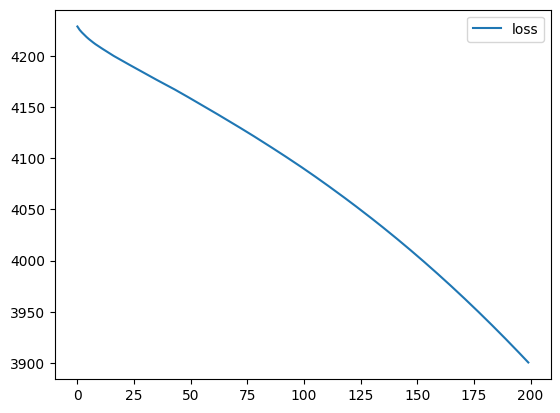

In [18]:
loss_df.plot()

In [22]:

ai_brain.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 145ms/step - loss: 4558.8960


4558.89599609375

In [21]:
x_test1 = Scaler.transform(x_test)
x_n1 = [[30]]
x_n1_1 = Scaler.transform(x_n1)
ai_brain.predict(x_n1_1)

1/1 [==============================] - 0s 93ms/step


array([[4.002346]], dtype=float32)